In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


# 엑셀 파일 경로
file_path = "C:\\Users\\dldud\\Downloads\\정선해양_관측정보.xls"

# 엑셀 파일을 읽어서 데이터프레임 생성
df = pd.read_excel(
    io=file_path,
    sheet_name="Sheet_1",  # 시트 이름
    header=0  # 첫 번째 행을 컬럼 이름으로 사용
)

print(df.head(5))
print(df.tail(5))


   해역   정선  정점   정선-정점       위도       경도         관측일시(KST) 연직변화차트  관측수심(m)  \
0  동해  104  11  104-11  37.0567  131.255  2023-02-26 20:32   차트보기        0   
1  동해  104  11  104-11  37.0567  131.255  2023-02-26 20:32   차트보기       10   
2  동해  104  11  104-11  37.0567  131.255  2023-02-26 20:32   차트보기       20   
3  동해  104  11  104-11  37.0567  131.255  2023-02-26 20:32   차트보기       30   
4  동해  104  11  104-11  37.0567  131.255  2023-02-26 20:32   차트보기       50   

   수온(℃)  염분(psu)  용존산소(ml/L)  인산염인(μmol/L)  아질산질소(μmol/L)  질산질소(μmol/L)  \
0    9.3    34.13      6.4001         0.507          0.244         7.010   
1    9.1    34.23      6.6243           NaN            NaN           NaN   
2    8.9    34.37      6.6304         0.489          0.228         8.079   
3    8.7    34.33      6.6255           NaN            NaN           NaN   
4    7.9    34.14      6.4805         0.565          0.319         9.774   

   규산규소(μmol/L)  pH  투명도(m)  기압(hPa)   조사선  
0        11.524 NaN     NaN  

In [5]:
#데이터프레임에서 관측일시가 2023-04, 2024-04를 포함하고 있을때
df["관측일시(KST)"] = df["관측일시(KST)"].astype(str)
filtered_df = df[df["관측일시(KST)"].str.contains("2023-04|2024-04")]
print(filtered_df)

    해역   정선  정점   정선-정점       위도       경도         관측일시(KST) 연직변화차트  관측수심(m)  \
14  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기        0   
15  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기       10   
16  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기       20   
17  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기       30   
18  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기       50   
19  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기       75   
20  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기      100   
21  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기      125   
22  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기      150   
23  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기      200   
24  동해  104  11  104-11  37.0567  131.255  2023-04-10 03:33   차트보기      250   
25  동해  104  11  104-11  37.0567  131.255  2023-04-1

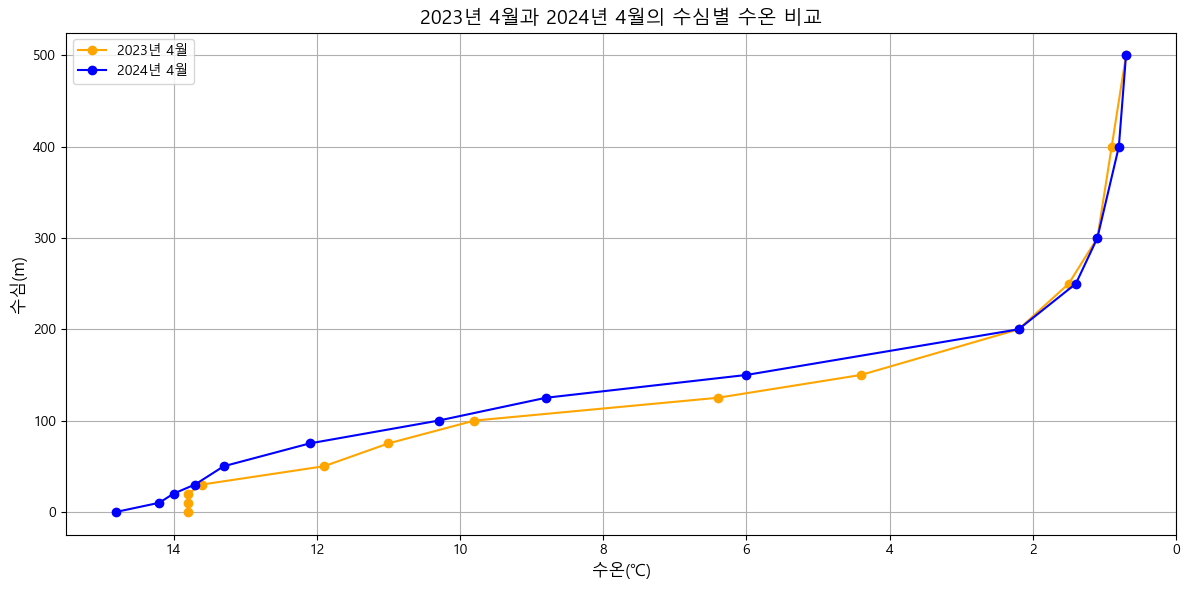

In [11]:
# '관측일시(KST)'를 datetime 형식으로 변환
df["관측일시(KST)"] = pd.to_datetime(df["관측일시(KST)"])

# 2023년 4월과 2024년 4월 데이터 필터링
df_2023_04 = df[(df["관측일시(KST)"].dt.year == 2023) & (df["관측일시(KST)"].dt.month == 4)]
df_2024_04 = df[(df["관측일시(KST)"].dt.year == 2024) & (df["관측일시(KST)"].dt.month == 4)]

# 그래프 생성
plt.figure(figsize=(12, 6))

# 2023년 4월 데이터 플롯
plt.plot(
    
    df_2023_04["수온(℃)"],
    df_2023_04["관측수심(m)"],
    label="2023년 4월",
    color="orange",
    marker="o",
    linestyle="-"
)

# 2024년 4월 데이터 플롯
plt.plot(
    #df_2024_04["관측수심(m)"],
    df_2024_04["수온(℃)"],
    df_2024_04["관측수심(m)"],
    label="2024년 4월",
    color="blue",
    marker="o",
    linestyle="-"
)

# 그래프 설정
plt.title("2023년 4월과 2024년 4월의 수심별 수온 비교", fontsize=14)
plt.ylabel("수심(m)", fontsize=12)
plt.xlabel("수온(℃)", fontsize=12)
plt.gca().invert_xaxis()  # 수심은 깊은 쪽이 크므로 x축 반전
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()
